In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import time
from time import strftime
from datetime import datetime
import matplotlib 
from IPython.core.display import clear_output
from sklearn.externals import joblib
import seaborn as sns
import re
#import nlkt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [3]:
bins=np.arange(0,50000+1000,1000)

In [409]:
bins

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000,
       27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000,
       36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000,
       45000, 46000, 47000, 48000, 49000, 50000])

In [4]:
features = joblib.load('/Users/natacha/Documents/Insight/Final Features/Final_Features_{}-{}.pkl'.format(
            0,
            999))

features=features.drop(columns=["index0","index1"])

for i in range(1,len(bins)-1):
    
    star_ID = bins[i]
    fin_ID = bins[i+1]
    
    ff = joblib.load('/Users/natacha/Documents/Insight/Final Features/Final_Features_{}-{}.pkl'.format(
            star_ID,
            fin_ID-1))
    ff=ff.drop(columns=["index0","index1"])
    
    features = pd.concat([features,ff])
    

In [689]:
features.keys()

Index(['goal', 'founded_bool', 'code', 'num_videos', 'num_pics', 'num_perks',
       'num_links', 'num_of_sent_about', 'num_of_sent_risk',
       'num_of_sent_perks', 'num_of_words_about', 'num_of_words_risk',
       'num_of_words_perks', 'freq_bold_A', 'freq_bold_R', 'freq_italic_A',
       'freq_italic_R', 'num_of_exclamation_A', 'num_of_exclamation_R',
       'num_of_exclamation_P', 'bool_A', 'bool_P', 'bool_R', 'freq_pitch_A',
       'freq_pitch_R', 'freq_pitch_P', 'words_x_perk'],
      dtype='object')

In [690]:
features1.keys()

Index(['goal', 'founded_bool', 'code', 'num_videos', 'num_pics', 'num_perks',
       'num_links', 'num_of_sent_about', 'num_of_sent_risk',
       'num_of_sent_perks', 'num_of_words_about', 'num_of_words_risk',
       'num_of_words_perks', 'freq_bold_A', 'freq_bold_R', 'freq_italic_A',
       'freq_italic_R', 'num_of_exclamation_A', 'num_of_exclamation_R',
       'num_of_exclamation_P', 'bool_A', 'bool_P', 'bool_R', 'freq_pitch_A',
       'freq_pitch_R', 'freq_pitch_P', 'words_x_perk'],
      dtype='object')

In [14]:
features["words_x_perk"]=features["num_of_words_perks"]/features["num_perks"]

features=features.apply(lambda x: x.fillna(x.mean()),axis=0);

In [15]:
features.isnull().any()

goal                    False
founded_bool            False
code                    False
num_videos              False
num_pics                False
num_perks               False
num_links               False
num_of_sent_about       False
num_of_sent_risk        False
num_of_sent_perks       False
num_of_words_about      False
num_of_words_risk       False
num_of_words_perks      False
freq_bold_A             False
freq_bold_R             False
freq_italic_A           False
freq_italic_R           False
num_of_exclamation_A    False
num_of_exclamation_R    False
num_of_exclamation_P    False
bool_A                  False
bool_P                  False
bool_R                  False
freq_pitch_A            False
freq_pitch_R            False
freq_pitch_P            False
words_x_perk            False
dtype: bool

In [16]:
features1=features[features["goal"]<10000]

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
len(features1.keys())

27

In [104]:
# I am removing bool_A bool_P since for no algorithm they make a difference

target=features1["founded_bool"]
data=features1.drop(columns=["founded_bool","bool_A","bool_P","num_of_words_perks","goal"])
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=10)

In [19]:
data.keys()

Index(['goal', 'code', 'num_videos', 'num_pics', 'num_perks', 'num_links',
       'num_of_sent_about', 'num_of_sent_risk', 'num_of_sent_perks',
       'num_of_words_about', 'num_of_words_risk', 'freq_bold_A', 'freq_bold_R',
       'freq_italic_A', 'freq_italic_R', 'num_of_exclamation_A',
       'num_of_exclamation_R', 'num_of_exclamation_P', 'bool_R',
       'freq_pitch_A', 'freq_pitch_R', 'freq_pitch_P', 'words_x_perk'],
      dtype='object')

In [12]:
data.keys()

Index(['goal', 'code', 'num_videos', 'num_pics', 'num_perks', 'num_links',
       'num_of_sent_about', 'num_of_sent_risk', 'num_of_sent_perks',
       'num_of_words_about', 'num_of_words_risk', 'freq_bold_A', 'freq_bold_R',
       'freq_italic_A', 'freq_italic_R', 'num_of_exclamation_A',
       'num_of_exclamation_R', 'num_of_exclamation_P', 'bool_R',
       'freq_pitch_A', 'freq_pitch_R', 'freq_pitch_P', 'words_x_perk'],
      dtype='object')

# Models

Decission Tree -> Hyper={}, name=clf_DS

Random Forest -> Hyper={}, name=clf_RF

EXTRA Tree -> Hyper={}, name=clf_ET

ADABoost -> Hyper={}, name=clf_AB



#### We will use the  model which can get higher pression after a warm start and after doing a 15-fold crossvalidation

In [105]:
mean_presition={}
feature_importance={}
ROC_mean={}

# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold



In [107]:
def mean_roc(fprs, tprs):
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 #label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
            
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    #ax.plot(mean_fpr, mean_tpr, color='b',
             #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             #lw=2, alpha=.8)    
            
    return (mean_fpr, mean_tpr)        

In [108]:
def compute_roc_auc(index):
    y_predict = clf_RF.predict_proba(x_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [109]:
clf_RF = RandomForestClassifier(
    n_estimators=150,
    criterion='gini',
    max_depth=13,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=True)
    #class_weight='balanced'
#)

In [110]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, prec= [], [], [], []
    
#for (train, test), i in zip(cv.split(data, target), range(20)):
for (train, test), i in zip(cv.split(x_train, y_train), range(5)):
     
    #print(i)
    clf_RF.n_estimators += 10
    #clf.fit(data.iloc[train], target.iloc[train])
    clf_RF.fit(x_train.iloc[train], y_train.iloc[train])
    
    predictions=clf_RF.predict(x_train.iloc[test])
    predictions2=clf_RF.predict(x_train.iloc[train])
    
    prec.append(metrics.average_precision_score(y_train.iloc[test],predictions))
    
    
    
    _, _, auc_score_train = compute_roc_auc(train)
    
    fpr, tpr, auc_score = compute_roc_auc(test)
    
    score = clf_RF.score(x_train.iloc[test], y_train.iloc[test])
    #predictions=clf.predict(x_train.iloc[test])


    prec1=metrics.average_precision_score(y_train.iloc[test],predictions)
    prec2=metrics.average_precision_score(y_train.iloc[train],predictions2)
    print("The test score is: ", prec1," train: ",prec2)
    
    #score = clf.score(x_train, y_train)
    #print("The train score is: ",score)
    
    #feature_importance["RF"]=clf_RF.feature_importances_
    scores.append((auc_score_train, auc_score))
    clf_RF.feature_importances_
    fprs.append(fpr)
    tprs.append(tpr)

feature_importance["RF"]=clf_RF.feature_importances_
ROC_mean["RF"]=mean_roc(fprs,tprs)
mean_presition["RF"]=np.mean(prec)
#plot_roc_curve(fprs, tprs);
auc_RF=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
#pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

The test score is:  0.7354831330955096  train:  0.8679919339750368
The test score is:  0.8491035749776983  train:  0.8366180961037872
The test score is:  0.8603047393057522  train:  0.8337782501480621
The test score is:  0.8679908425321399  train:  0.831603699145824
The test score is:  0.864937306464769  train:  0.8328585488895746


In [636]:
 #for the model that predicts probability I have trained with the goal
    # precission =0.84
    #auc=0.8
    
    #Index(['goal', 'code', 'num_videos', 'num_pics', 'num_perks', 'num_links',
       #'num_of_sent_about', 'num_of_sent_risk', 'num_of_sent_perks',
       #'num_of_words_about', 'num_of_words_risk', 'freq_bold_A', 'freq_bold_R',
       #'freq_italic_A', 'freq_italic_R', 'num_of_exclamation_A',
       #'num_of_exclamation_R', 'num_of_exclamation_P', 'bool_R',
       #'freq_pitch_A', 'freq_pitch_R', 'freq_pitch_P', 'words_x_perk'],
     # dtype='object')
joblib.dump(clf_RF, 'trained_clf.pkl')

['trained_clf.pkl']

In [436]:
clf_RF.n_estimators += 10
clf_RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=310, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=True)

In [647]:
clf_RF.score(x_test,y_test)

0.7395971535399831

In [55]:
predictions=clf_RF.predict(x_test)

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.75      0.53      0.62      3174
       True       0.75      0.89      0.82      5117

avg / total       0.75      0.75      0.74      8291



In [56]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n      False       0.75      0.53      0.62      3174\n       True       0.75      0.89      0.82      5117\n\navg / total       0.75      0.75      0.74      8291\n'

In [618]:
clf_RF.score(x_train,y_train)

0.9168073984720547

In [633]:
mean_presition["RF"]

0.8470999739503512

In [648]:
auc_RF=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [635]:
auc_RF

,AUC Train,AUC Test
0,0.973434,0.808565
1,0.943440,0.967710
2,0.944789,0.969090
3,0.945153,0.972076
4,0.946867,0.970956


# Decission Tree

In [111]:
def compute_roc_auc(index):
    y_predict = clf_DT.predict_proba(x_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [112]:
from sklearn import tree
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=10)

#rf.fit(x_train, y_train)
clf_DT = tree.DecisionTreeClassifier(max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1)
#clf_DT.fit(x_train, y_train)

In [113]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, prec= [], [], [], []
    
#for (train, test), i in zip(cv.split(data, target), range(20)):
for (train, test), i in zip(cv.split(x_train, y_train), range(5)):
     
    #print(i)
    #clf_RF.n_estimators += 10
    #clf.fit(data.iloc[train], target.iloc[train])
    clf_DT.fit(x_train.iloc[train], y_train.iloc[train])
    
    predictions=clf_DT.predict(x_train.iloc[test])
    predictions2=clf_DT.predict(x_train.iloc[train])
    
    prec.append(metrics.average_precision_score(y_train.iloc[test],predictions))
    
    
    
    _, _, auc_score_train = compute_roc_auc(train)
    
    fpr, tpr, auc_score = compute_roc_auc(test)
    
    score = clf_DT.score(x_train.iloc[test], y_train.iloc[test])
    #predictions=clf.predict(x_train.iloc[test])


    prec1=metrics.average_precision_score(y_train.iloc[test],predictions)
    prec2=metrics.average_precision_score(y_train.iloc[train],predictions2)
    print("The test score is: ", prec1," train: ",prec2)
    
    #score = clf.score(x_train, y_train)
    #print("The train score is: ",score)
    
    #feature_importance["RF"]=clf_RF.feature_importances_
    scores.append((auc_score_train, auc_score))
    clf_DT.feature_importances_
    fprs.append(fpr)
    tprs.append(tpr)

feature_importance["DT"]=clf_DT.feature_importances_
ROC_mean["DT"]=mean_roc(fprs,tprs)
mean_presition["DT"]=np.mean(prec)
auc_DT=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
#plot_roc_curve(fprs, tprs);
#pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

The test score is:  0.7378600670798128  train:  0.7639735875731202
The test score is:  0.7184159799629716  train:  0.7525279728247315
The test score is:  0.7261635353219607  train:  0.7543702609800114
The test score is:  0.741380023573291  train:  0.7573472432150403
The test score is:  0.7337544515703711  train:  0.7526008279973811


In [578]:
clf_DT.score(x_test,y_test)

0.7328428416355084

In [580]:
clf_DT.score(x_train,y_train)

0.7680739847205469

In [579]:
mean_presition["DT"]

0.7380738589779423

In [664]:
auc_DT=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [582]:
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

,AUC Train,AUC Test
0,0.830354,0.778781
1,0.833665,0.777952
2,0.832600,0.776107
3,0.832942,0.781832
4,0.831054,0.772388


# ADABoost

In [114]:
clf_AC=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3,min_samples_split=2,
                            min_samples_leaf=1,),                         
                          n_estimators=150, learning_rate=1.0, random_state=None)

In [115]:
def compute_roc_auc(index):
    y_predict = clf_AC.predict_proba(x_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [116]:
clf_AC=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3,min_samples_split=2,
                            min_samples_leaf=1,),                         
                          n_estimators=150, learning_rate=1.0, random_state=None)


cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, prec= [], [], [], []
    
#for (train, test), i in zip(cv.split(data, target), range(20)):
for (train, test), i in zip(cv.split(x_train, y_train), range(5)):
     
    #print(i)
    clf_AC.n_estimators += 10
    #clf.fit(data.iloc[train], target.iloc[train])
    clf_AC.fit(x_train.iloc[train], y_train.iloc[train])
    
    predictions=clf_AC.predict(x_train.iloc[test])
    predictions2=clf_AC.predict(x_train.iloc[train])
    
    prec.append(metrics.average_precision_score(y_train.iloc[test],predictions))
    
    
    
    _, _, auc_score_train = compute_roc_auc(train)
    
    fpr, tpr, auc_score = compute_roc_auc(test)
    
    score = clf_AC.score(x_train.iloc[test], y_train.iloc[test])
    #predictions=clf.predict(x_train.iloc[test])


    prec1=metrics.average_precision_score(y_train.iloc[test],predictions)
    prec2=metrics.average_precision_score(y_train.iloc[train],predictions2)
    print("The test score is: ", prec1," train: ",prec2)
    #score = clf.score(x_train, y_train)
    #print("The train score is: ",score)
    
    #feature_importance["RF"]=clf_RF.feature_importances_
    scores.append((auc_score_train, auc_score))
    #clf_AC.feature_importances_
    fprs.append(fpr)
    tprs.append(tpr)

feature_importance["AC"]=clf_AC.feature_importances_
ROC_mean["AC"]=mean_roc(fprs,tprs)
mean_presition["AC"]=np.mean(prec)
#plot_roc_curve(fprs, tprs);
auc_AC=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
#pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

The test score is:  0.7243924830374525  train:  0.8021461464782133
The test score is:  0.7301489918841648  train:  0.8050332995191404
The test score is:  0.7262388481795442  train:  0.8138834416078495
The test score is:  0.7260473588347962  train:  0.8108309365008548
The test score is:  0.7225468981914454  train:  0.8156900444323508


In [37]:
clf_AC.score(x_test,y_test)

0.7268122060065131

In [38]:
clf_AC.score(x_train,y_train)

0.8253719340570969

In [677]:
auc_AC=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [678]:
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

,AUC Train,AUC Test
0,0.942901,0.921908
1,0.938485,0.940515
2,0.938397,0.940793
3,0.936654,0.947515
4,0.937862,0.942836


In [679]:
mean_presition["AC"]

0.7258447987629703

In [78]:
clf_AC.n_estimators

200

# Extra Tree

In [33]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

In [117]:
def mean_roc(fprs, tprs):
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 #label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
            
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    #ax.plot(mean_fpr, mean_tpr, color='b',
             #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             #lw=2, alpha=.8)    
            
    return (mean_fpr, mean_tpr)        

In [118]:
def compute_roc_auc(index):
    y_predict = clf_ET.predict_proba(x_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [119]:
clf_ET = ExtraTreesClassifier(n_estimators=150,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=True)

    #class_weight='balanced')
#clf_ET.fit(x_train, y_train)

In [120]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, prec= [], [], [], []
    
#for (train, test), i in zip(cv.split(data, target), range(20)):
for (train, test), i in zip(cv.split(x_train, y_train), range(5)):
     
    #print(i)
    clf_ET.n_estimators += 10
    #clf.fit(data.iloc[train], target.iloc[train])
    clf_ET.fit(x_train.iloc[train], y_train.iloc[train])
    
    predictions=clf_ET.predict(x_train.iloc[test])
    predictions2=clf_ET.predict(x_train.iloc[train])
    
    prec.append(metrics.average_precision_score(y_train.iloc[test],predictions))
    
    
    
    _, _, auc_score_train = compute_roc_auc(train)
    
    fpr, tpr, auc_score = compute_roc_auc(test)
    
    score = clf_ET.score(x_train.iloc[test], y_train.iloc[test])
    #predictions=clf.predict(x_train.iloc[test])


    prec1=metrics.average_precision_score(y_train.iloc[test],predictions)
    prec2=metrics.average_precision_score(y_train.iloc[train],predictions2)
    print("The test score is: ", prec1,prec2)
    
    #score = clf.score(x_train, y_train)
    #print("The train score is: ",score)
    
    #feature_importance["RF"]=clf_RF.feature_importances_
    scores.append((auc_score_train, auc_score))
    clf_ET.feature_importances_
    fprs.append(fpr)
    tprs.append(tpr)

feature_importance["ET"]=clf_ET.feature_importances_
ROC_mean["ET"]=mean_roc(fprs,tprs)
mean_presition["ET"]=np.mean(prec)
#plot_roc_curve(fprs, tprs);
auc_ET=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
#pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

The test score is:  0.7324183914676093 0.8585067618897885
The test score is:  0.8436104061632312 0.8254904832724151
The test score is:  0.8490626926221823 0.823935633505788
The test score is:  0.8589386207671483 0.8218800144403697
The test score is:  0.85243036122247 0.8229774659126179


In [469]:
mean_presition["ET"]

0.8578062127189813

In [673]:
auc_ET=pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [52]:
np.mean(auc_ET["AUC Test"])

0.9346603547811474

In [51]:
np.mean(auc_RF["AUC Test"])

0.9458338424698173

In [53]:
mean_presition

{'AC': 0.7423441072230496,
 'DT': 0.7401775440650693,
 'ET': 0.8496301437627973,
 'RF': 0.8481872886938315}

In [121]:
mean_presition

{'AC': 0.7258749160254807,
 'DT': 0.7315148115016814,
 'ET': 0.8272920944485282,
 'RF': 0.8355639192751738}

In [46]:
plt.style.use('fivethirtyeight')

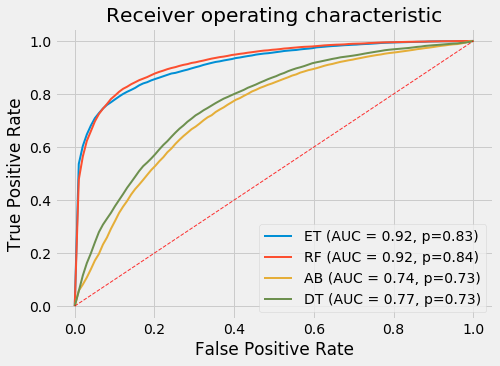

In [122]:
plt.figure(figsize=(7,5))

plt.plot(ROC_mean["ET"][0],ROC_mean["ET"][1],label='ET (AUC = %0.2f, p=%0.2f)' % (np.mean(auc_ET["AUC Test"]), mean_presition["ET"]),lw=2)
plt.plot(ROC_mean["RF"][0],ROC_mean["RF"][1],label='RF (AUC = %0.2f, p=%0.2f)' % (np.mean(auc_RF["AUC Test"]), mean_presition["RF"]),lw=2)
plt.plot(ROC_mean["AC"][0],ROC_mean["AC"][1],label='AB (AUC = %0.2f, p=%0.2f)' % (np.mean(auc_AC["AUC Test"]), mean_presition["AC"]),lw=2)
plt.plot(ROC_mean["DT"][0],ROC_mean["DT"][1],label='DT (AUC = %0.2f, p=%0.2f)' % (np.mean(auc_DT["AUC Test"]), mean_presition["DT"]),lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

#col_labels=['col1','col2','col3']
#row_labels=['row1','row2','row3']
#table_vals=[[11,12,13],[21,22,23],[31,32,33]]
# the rectangle is where I want to place the table
#the_table = plt.table(cellText=table_vals,
                  #colWidths = [0.1]*4,
                  #rowLabels=row_labels,
                  #colLabels=col_labels,
                  #loc='center right')
#plt.text(12,3.4,'Table Title',size=8)

    #ax.legend(loc="lower right")
plt.legend()
plt.savefig("roc_curve.jpg",bbox_inches='tight')    
#plt.legend()

In [81]:
plt.table?

In [485]:
predictions=clf_ET.predict(x_test)

In [486]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

      False       0.74      0.53      0.62      3154
       True       0.75      0.89      0.82      5137

avg / total       0.75      0.75      0.74      8291



In [473]:
clf_ET.score(x_test,y_test)

0.7505729103847546

In [474]:
clf_ET.score(x_train,y_train)

0.8831926015279453

In [279]:
clf_RF.score(x_test,y_test)

0.7418887950790013

In [280]:
clf_RF.score(x_train,y_train)

0.8524728588661037

In [277]:
mean_presition["ET"]

0.8267312208369404

In [278]:
mean_presition["RF"]

0.8233115998484466

# Feature Importance

In [153]:
feature_final=pd.DataFrame()

In [161]:
sum1=np.zeros(22)
al=0
for key in feature_importance.keys():
    sum1=sum1+feature_importance[key]*mean_presition[key]
    al=al+mean_presition[key]

In [ ]:
x_values = list(range(len(importances)))


In [166]:
feature_final["names"]=list(x_test.columns)
feature_final["RF"]=feature_importance["RF"]
feature_final["AB"]=feature_importance["AC"]
feature_final["DT"]=feature_importance["DT"]
feature_final["ET"]=feature_importance["ET"]

feature_final["RF_t"]=feature_importance["RF"]*mean_presition["RF"]/al
feature_final["AB_t"]=feature_importance["AC"]*mean_presition["AC"]/al
feature_final["DT_t"]=feature_importance["DT"]*mean_presition["DT"]/al
feature_final["ET_t"]=feature_importance["ET"]*mean_presition["ET"]/al

feature_final["total"]=sum1

In [174]:
x_values = list(range(len(feature_final)))

In [171]:
feature_final=feature_final.sort_values(by=["total"],ascending=False)

In [172]:
feature_final

,names,RF,AB,DT,ET,RF_t,AB_t,DT_t,ET_t,total
3,num_perks,0.128313,0.041063,0.464832,0.109930,0.034361,0.009553,0.108976,0.029146,0.567995
17,bool_R,0.036465,0.008839,0.135741,0.110630,0.009765,0.002056,0.031823,0.029332,0.227706
8,num_of_words_about,0.072891,0.087899,0.033709,0.061699,0.019519,0.020448,0.007903,0.016359,0.200410
0,code,0.052302,0.048421,0.075838,0.061115,0.014006,0.011264,0.017780,0.016204,0.184886
21,words_x_perk,0.056557,0.096755,0.012680,0.045556,0.015145,0.022508,0.002973,0.012079,0.164453
10,freq_bold_A,0.053751,0.057771,0.052542,0.045563,0.014394,0.013439,0.012318,0.012080,0.162976
20,freq_pitch_P,0.055440,0.080241,0.025293,0.046962,0.014846,0.018667,0.005930,0.012451,0.161921
18,freq_pitch_A,0.052765,0.099220,0.012849,0.038672,0.014130,0.023082,0.003012,0.010253,0.157503
7,num_of_sent_perks,0.074163,0.037655,0.010570,0.062312,0.019860,0.008760,0.002478,0.016521,0.148583
5,num_of_sent_about,0.064712,0.041932,0.018330,0.060328,0.017329,0.009755,0.004297,0.015995,0.147825


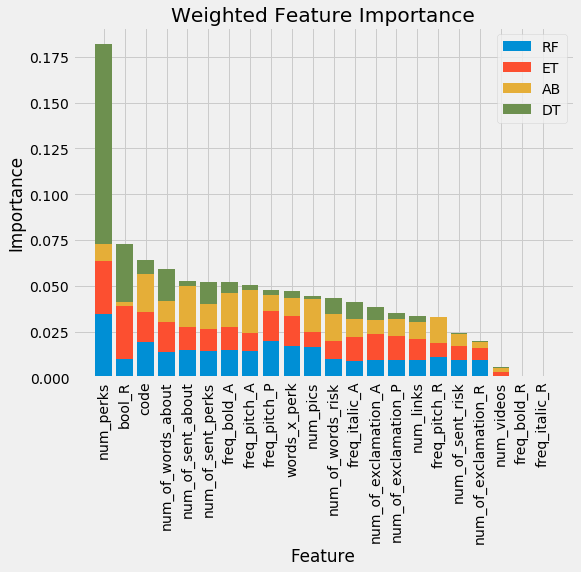

In [195]:
plt.figure(figsize=(8,6))
plt.bar(x_values,feature_final["RF_t"],label="RF")
plt.bar(x_values,feature_final["ET_t"],bottom=feature_final["RF_t"],label="ET")
plt.bar(x_values,feature_final["AB_t"],bottom=feature_final["RF_t"]+feature_final["ET_t"],label="AB")
plt.bar(x_values,feature_final["DT_t"],bottom=feature_final["RF_t"]+feature_final["AB_t"]+feature_final["ET_t"],label="DT")
plt.legend()
plt.xticks(np.array(x_values), names, rotation="vertical")
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Weighted Feature Importance')
plt.savefig("featture_importance.jpg",bbox_inches='tight')

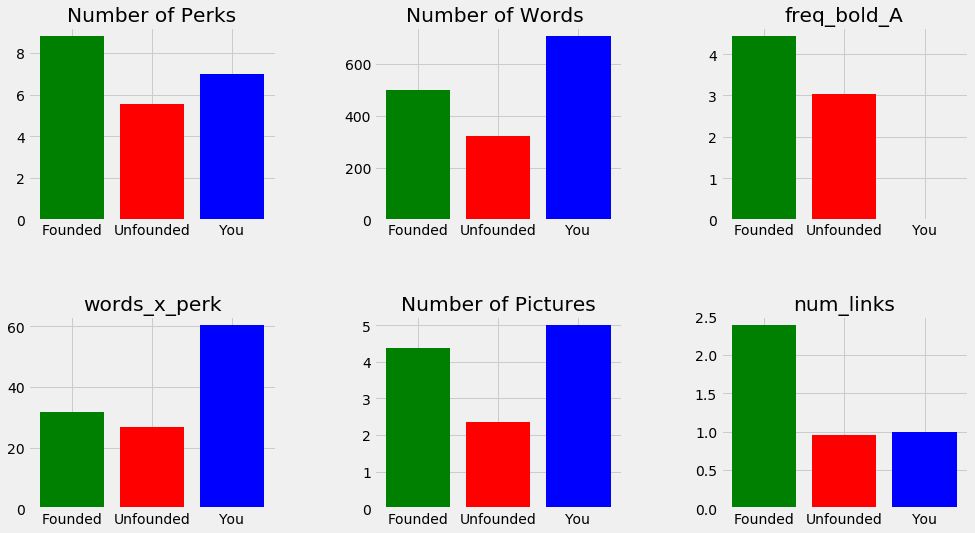

In [769]:
plt.figure(figsize=(15, 15))

plt.subplot(431)
plt.bar([1,2,3],[np.mean(features1_F["num_perks"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["num_perks"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["num_perks"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("Number of Perks")


plt.subplot(432) # equivalent to: plt.subplot(2, 2, 1)
plt.bar([1,2,3],[np.mean(features1_F["num_of_words_about"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["num_of_words_about"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["num_of_words_about"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("Number of Words ")
#plt.grid("false")



plt.subplot(433) # equivalent to: plt.subplot(2, 2, 1)
plt.bar([1,2,3],[np.mean(features1_F["freq_bold_A"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["freq_bold_A"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["freq_bold_A"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("freq_bold_A")
#plt.grid("false")

#plt.subplot(434) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["freq_pitch_A"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["freq_pitch_A"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["freq_pitch_A"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("freq_pitch_A")
#plt.grid("false")


#plt.subplot(435) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["freq_pitch_P"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["freq_pitch_P"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["freq_pitch_P"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("freq_pitch_P")
#plt.grid("false")


plt.subplot(434) # equivalent to: plt.subplot(2, 2, 1)
plt.bar([1,2,3],[np.mean(features1_F["words_x_perk"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["words_x_perk"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["words_x_perk"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("words_x_perk")
#plt.grid("false")

plt.subplot(435) # equivalent to: plt.subplot(2, 2, 1)
plt.bar([1,2,3],[np.mean(features1_F["num_pics"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["num_pics"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["num_pics"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("Number of Pictures")
#plt.grid("false")

#plt.subplot(438) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["freq_italic_A"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["freq_italic_A"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["freq_italic_A"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("freq_italic_A")
#plt.grid("false")



#plt.subplot(4,3,9) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["num_of_exclamation_A"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["num_of_exclamation_A"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["num_of_exclamation_A"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("num_of_exclamation_A")
#plt.grid("false")


plt.subplot(4,3,6) # equivalent to: plt.subplot(2, 2, 1)
plt.bar([1,2,3],[np.mean(features1_F["num_links"]),0,0],color="g")
plt.bar([1,2,3],[0,np.mean(features1_UF["num_links"]),0],color="r")
plt.bar([1,2,3],[0,0,ff["num_links"]],color="b")
plt.xticks([1,2,3], cate, rotation="horizontal")
plt.title("num_links")

#plt.subplot(4,3,11) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["num_of_exclamation_P"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["num_of_exclamation_P"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["num_of_exclamation_P"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("num_of_exclamation_P")
#plt.grid("false")
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)

#plt.subplot(4,3,12) # equivalent to: plt.subplot(2, 2, 1)
#plt.bar([1,2,3],[np.mean(features1_F["num_of_sent_risk"]),0,0],color="g")
#plt.bar([1,2,3],[0,np.mean(features1_UF["num_of_sent_risk"]),0],color="r")
#plt.bar([1,2,3],[0,0,ff["num_of_sent_risk"]],color="b")
#plt.xticks([1,2,3], cate, rotation="horizontal")
#plt.title("num_of_sent_risk")